# 1. Importing and Browsing Data 

Performed by: Kendall and Andrew

In [5]:
cd data

C:\Users\Jackson\Documents\flatiron\project1\dsc-phase-1-project-v3\data


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.ticker as mticker
aviation = pd.read_csv('Aviation_Data.csv')

C:\Users\Jackson\anaconda\anaconda-this one\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [8]:
aviation.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


# 2. Cleaning Data

Performed by: Kendall and Andrew

1. Drop duplicates based on event ID: 1390 entries.
2. Standardized weather conditions (upper/lower casing)
3. Standardized make names (upper/lower casing)
4. Drop null values for event date: 1 entry.
4. Created Year column.

In [9]:
#dropping dupliates
duplicates = aviation[aviation.duplicated()]
print(len(duplicates))
duplicates.head(30)
aviation = aviation.drop_duplicates(subset='Event.Id')

1390


In [10]:
#dropping event ID N/A
aviation.dropna(subset=['Event.Id'], inplace=True)

In [11]:
#standardizing weather conditions
aviation['Weather.Condition'] = aviation['Weather.Condition'].replace('Unk', 'UNK')

In [12]:
aviation['Engine.Type'] = aviation['Engine.Type'].replace('NONE', 'None')

In [13]:
#standardizing make names
aviation['Make'] = aviation['Make'].apply(lambda x: str(x).title())
aviation['Make'] = aviation['Make'].replace('PIPER', 'Piper')
aviation['Make'] = aviation['Make'].replace('CESSNA', 'Cessna')
aviation['Make'] = aviation['Make'].replace('BEECH', 'Beech')
aviation['Make'] = aviation['Make'].replace('BELL', 'Bell')

In [14]:
aviation['Make'].value_counts()

Cessna                       26839
Piper                        14744
Beech                         5332
Bell                          2706
Boeing                        2652
                             ...  
Ammeter                          1
Nasa Ames Research Center        1
Madewell                         1
Mcfaul, Daniel D.                1
Stys                             1
Name: Make, Length: 7553, dtype: int64

In [15]:
#dropping nans for event date
aviation.dropna(subset=['Event.Date'], inplace=True)

In [16]:
#creating year column
aviation['Year'] = aviation['Event.Date'].astype(str).str[:4]

In [17]:
#how can a plane have 0 engines? what are these 0 engine values?
zero_engine_aircrafts = aviation.loc[aviation['Number.of.Engines'] == 0]

In [18]:
#counting entires with 0 engines and looking more into the aircraft category
len(zero_engine_aircrafts), zero_engine_aircrafts['Aircraft.Category'].value_counts()

(1210,
 Glider          344
 Balloon         150
 Airplane          9
 Weight-Shift      1
 Name: Aircraft.Category, dtype: int64)

In [19]:
#dropping aircrafts with zero engines from our aviation dataset
aviation = aviation.loc[aviation['Number.of.Engines'] != 0]

# 3A. ENGINE COUNT & TYPE - Trend Exploration

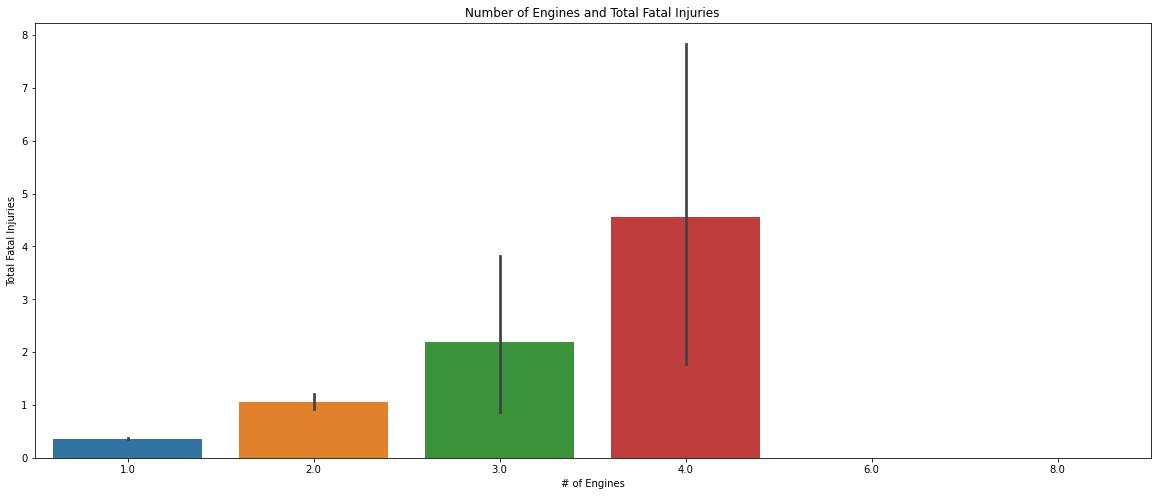

In [20]:
#plot of engine count and fatal injuries
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=aviation['Number.of.Engines'], y=aviation['Total.Fatal.Injuries'])

ax.set_title('Number of Engines and Total Fatal Injuries')
ax.set_xlabel('# of Engines')
ax.set_ylabel('Total Fatal Injuries');

In [21]:
#sum of injuries for engine count
engine_count = aviation.groupby('Number.of.Engines').sum()
engine_count

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Number.of.Engines,,,,
1.0,21627.0,13818.0,17592.0,71816.0
2.0,10048.0,3385.0,4416.0,183081.0
3.0,861.0,316.0,1141.0,46148.0
4.0,1651.0,231.0,506.0,37622.0
6.0,0.0,0.0,0.0,0.0
8.0,0.0,21.0,3.0,11.0


In [22]:
#means of injueries for engine count
aviation.groupby('Number.of.Engines').mean()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Number.of.Engines,,,,
1.0,0.359444,0.232056,0.291925,1.109916
2.0,1.052918,0.361839,0.474227,17.838936
3.0,2.190840,0.784119,2.881313,104.171558
4.0,4.560773,0.634615,1.390110,93.354839
6.0,0.000000,0.000000,0.000000,0.000000
8.0,0.000000,7.000000,1.000000,3.666667


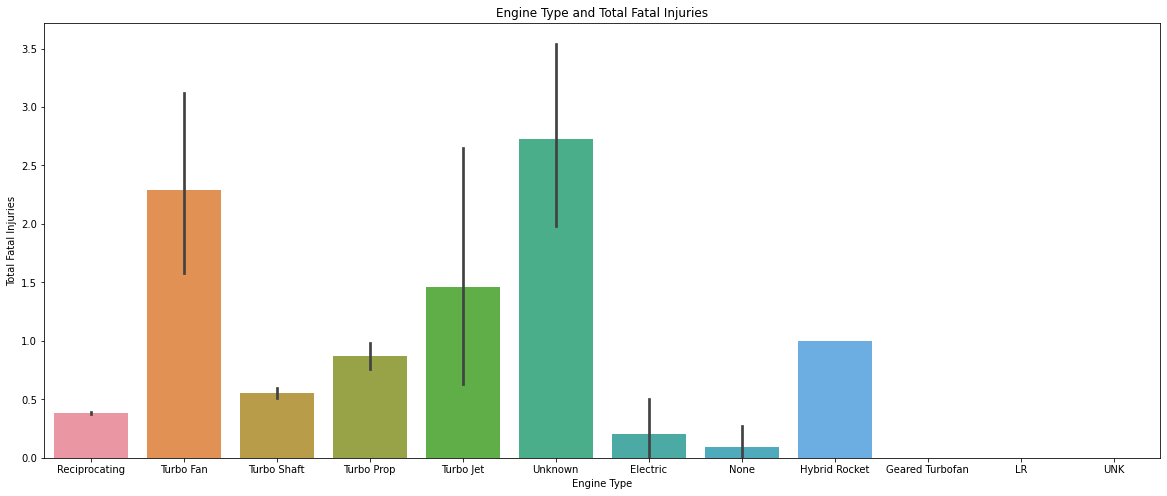

In [23]:
#plot of engine type and total fatal injuries
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=aviation['Engine.Type'], y=aviation['Total.Fatal.Injuries'])

ax.set_title('Engine Type and Total Fatal Injuries')
ax.set_xlabel('Engine Type')
ax.set_ylabel('Total Fatal Injuries');

In [24]:
engine_count['Total Passengers'] = engine_count['Total.Fatal.Injuries'] + engine_count['Total.Serious.Injuries'] + engine_count['Total.Minor.Injuries'] + engine_count['Total.Uninjured']

# 3B: ENGINE COUNT - Ratio of Uninjured to All Passengers 

Performed by: Kendall 

In [25]:
engine_count['Ratio Uninjured'] = engine_count['Total.Uninjured'] / engine_count['Total Passengers']
engine_count

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total Passengers,Ratio Uninjured
Number.of.Engines,,,,,,
1.0,21627.0,13818.0,17592.0,71816.0,124853.0,0.575204
2.0,10048.0,3385.0,4416.0,183081.0,200930.0,0.911168
3.0,861.0,316.0,1141.0,46148.0,48466.0,0.952173
4.0,1651.0,231.0,506.0,37622.0,40010.0,0.940315
6.0,0.0,0.0,0.0,0.0,0.0,NaN
8.0,0.0,21.0,3.0,11.0,35.0,0.314286


In [32]:
engine_count['Ratio Uninjured'] = engine_count['Ratio Uninjured']/100 

In [33]:
engine_count

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total Passengers,Ratio Uninjured
Number.of.Engines,,,,,,
1.0,21627.0,13818.0,17592.0,71816.0,124853.0,0.575204
2.0,10048.0,3385.0,4416.0,183081.0,200930.0,0.911168
3.0,861.0,316.0,1141.0,46148.0,48466.0,0.952173
4.0,1651.0,231.0,506.0,37622.0,40010.0,0.940315
6.0,0.0,0.0,0.0,0.0,0.0,NaN
8.0,0.0,21.0,3.0,11.0,35.0,0.314286


In [34]:
from matplotlib.ticker import PercentFormatter

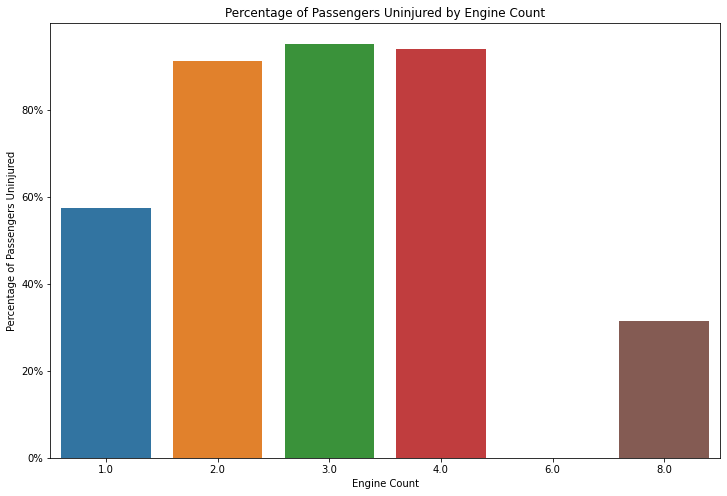

In [35]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x=engine_count.index, y=engine_count['Ratio Uninjured'])
ax.set_title('Percentage of Passengers Uninjured by Engine Count')
ax.set_xlabel('Engine Count')
ax.set_ylabel('Percentage of Passengers Uninjured')
ax.axes.yaxis.set_major_formatter(PercentFormatter(1));

<ipython-input-114-f3f1274aab0c>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value);


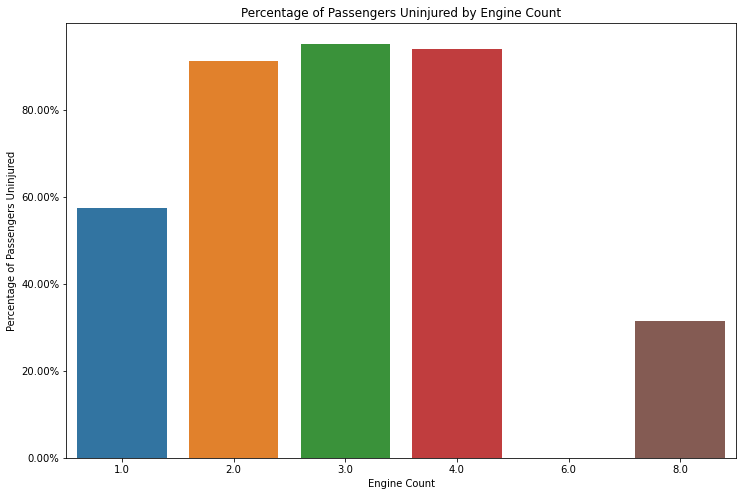

In [114]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x=engine_count.index, y=engine_count['Ratio Uninjured'])
ax.set_title('Percentage of Passengers Uninjured by Engine Count')
ax.set_xlabel('Engine Count')
ax.set_ylabel('Percentage of Passengers Uninjured')
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value);

*94-95% of passengers in accidents of planes with 3 and 4 engines were uninjured.

# 3C: ENGINE TYPE - Ratio of Uninjured to All Passengers 


Performed by: Kendall

In [102]:
#sums of engine types and total injuries
aviation.groupby('Engine.Type').sum()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Engine.Type,,,,,
Electric,24.0,2.0,1.0,0.0,7.0
Geared Turbofan,22.0,0.0,0.0,0.0,121.0
Hybrid Rocket,1.0,1.0,0.0,1.0,0.0
LR,16.0,0.0,21.0,3.0,11.0
None,11.0,1.0,8.0,7.0,65.0
Reciprocating,74452.0,23125.0,13366.0,17157.0,72941.0
Turbo Fan,5344.0,4419.0,1812.0,3279.0,194409.0
Turbo Jet,1446.0,841.0,234.0,363.0,32504.0
Turbo Prop,5126.0,2448.0,671.0,885.0,14836.0


In [103]:
#means of engine type and number of injuries
aviation.groupby('Engine.Type').mean()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Engine.Type,,,,,
Electric,3.000000,0.200000,0.100000,0.000000,0.700000
Geared Turbofan,2.000000,0.000000,0.000000,0.000000,10.083333
Hybrid Rocket,1.000000,1.000000,0.000000,1.000000,0.000000
LR,8.000000,0.000000,10.500000,1.500000,5.500000
None,1.571429,0.090909,0.727273,0.636364,5.909091
Reciprocating,1.088830,0.383728,0.224571,0.285223,1.128524
Turbo Fan,2.337708,2.294393,0.908726,1.675524,83.688765
Turbo Jet,2.139053,1.460069,0.406957,0.640212,50.083205
Turbo Prop,1.572875,0.869936,0.248151,0.323111,4.851537


In [104]:
engine_types = aviation.groupby('Engine.Type').sum()

In [105]:
#creating a total passengers column and then a ratio of total uninjured to total passengers
engine_types['Total Passengers'] = engine_types['Total.Fatal.Injuries'] + engine_types['Total.Serious.Injuries'] + engine_types['Total.Minor.Injuries'] + engine_types['Total.Uninjured']
engine_types['Ratio Uninjured'] = engine_types['Total.Uninjured'] / engine_types['Total Passengers']

In [106]:
engine_types

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total Passengers,Ratio Uninjured
Engine.Type,,,,,,,
Electric,24.0,2.0,1.0,0.0,7.0,10.0,0.700000
Geared Turbofan,22.0,0.0,0.0,0.0,121.0,121.0,1.000000
Hybrid Rocket,1.0,1.0,0.0,1.0,0.0,2.0,0.000000
LR,16.0,0.0,21.0,3.0,11.0,35.0,0.314286
None,11.0,1.0,8.0,7.0,65.0,81.0,0.802469
Reciprocating,74452.0,23125.0,13366.0,17157.0,72941.0,126589.0,0.576203
Turbo Fan,5344.0,4419.0,1812.0,3279.0,194409.0,203919.0,0.953364
Turbo Jet,1446.0,841.0,234.0,363.0,32504.0,33942.0,0.957634
Turbo Prop,5126.0,2448.0,671.0,885.0,14836.0,18840.0,0.787473


In [107]:
engine_types['Ratio Uninjured'] = engine_types['Ratio Uninjured']*100 

In [108]:
#making the column into a percentage format
#engine_types['Ratio Uninjured'] = engine_types['Ratio Uninjured']*100 
#engine_types['Ratio Uninjured'] = engine_types['Ratio Uninjured'].map('{:.2%}'.format)

<ipython-input-109-b3bddda0bf0e>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value)


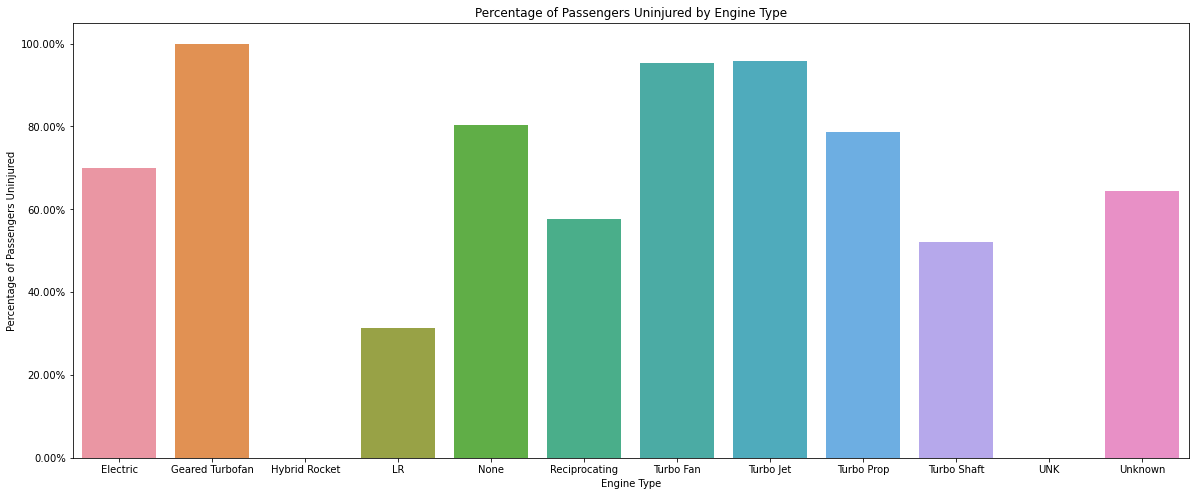

In [109]:
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=engine_types.index, y=engine_types['Ratio Uninjured'])
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)
ax.set_title('Percentage of Passengers Uninjured by Engine Type')
ax.set_xlabel('Engine Type')
ax.set_ylabel('Percentage of Passengers Uninjured');

*Over 95% of passengers on Turbo Fan and Turbo Jet planes are uninjured. 

# 4A. AIRCRAFT DAMAGE - Trend Exploration

Performed by: Kendall

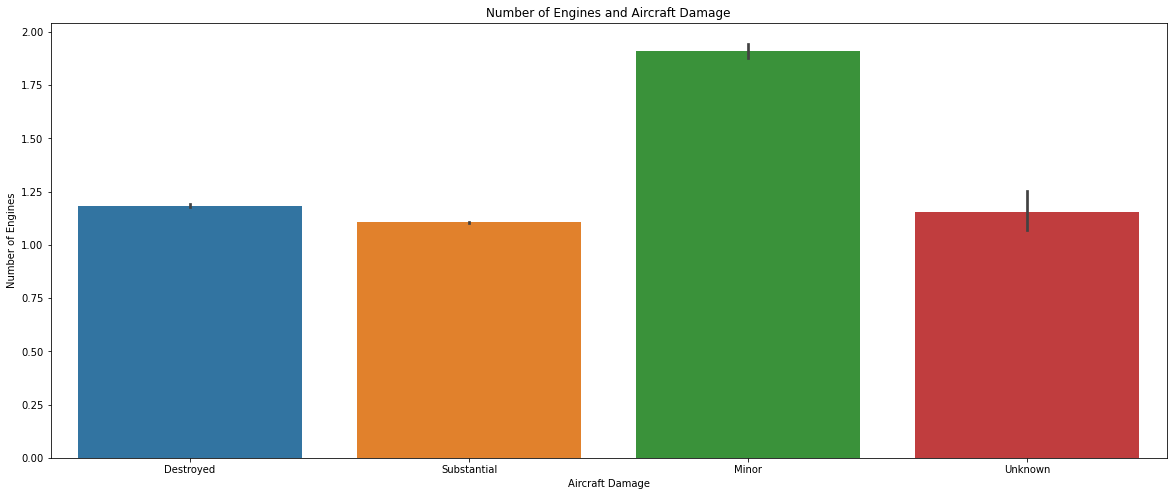

In [58]:
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=aviation['Aircraft.damage'], y=aviation['Number.of.Engines'])

ax.set_title('Number of Engines and Aircraft Damage')
ax.set_xlabel('Aircraft Damage')
ax.set_ylabel('Number of Engines');

In [59]:
aviation.groupby('Aircraft.damage').sum()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Aircraft.damage,,,,,
Destroyed,19650.0,39366.0,6836.0,5972.0,8403.0
Minor,3918.0,275.0,461.0,1727.0,104974.0
Substantial,66512.0,7660.0,12147.0,17335.0,145011.0
Unknown,68.0,55.0,16.0,25.0,477.0


In [60]:
aviation.groupby('Aircraft.damage').mean()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Aircraft.damage,,,,,
Destroyed,1.183022,2.238358,0.427758,0.378598,0.534100
Minor,1.910288,0.123043,0.205162,0.770638,41.312082
Substantial,1.105328,0.143850,0.226644,0.317986,2.427694
Unknown,1.152542,0.470085,0.136752,0.213675,4.076923


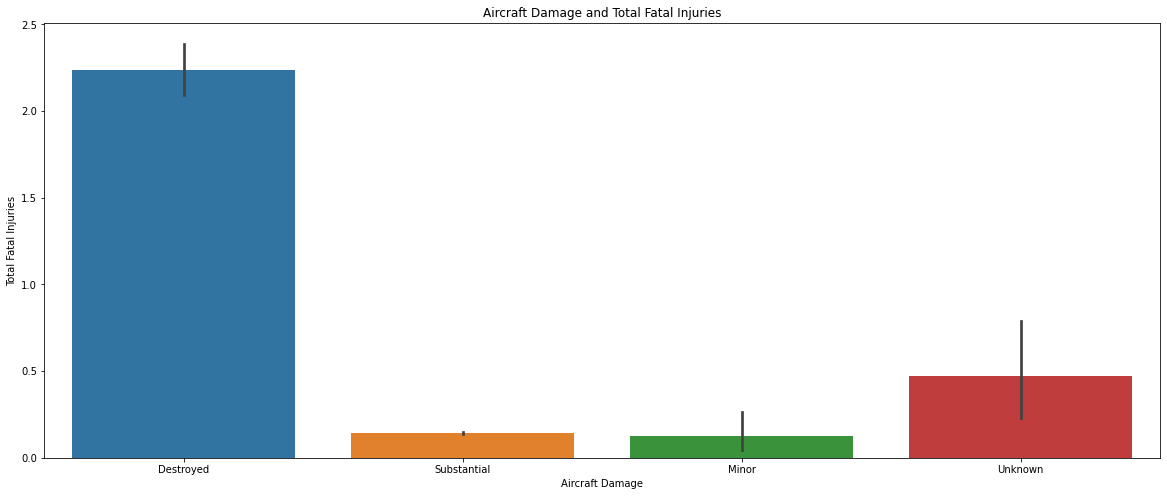

In [61]:
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(x=aviation['Aircraft.damage'], y=aviation['Total.Fatal.Injuries'])

ax.set_title('Aircraft Damage and Total Fatal Injuries')
ax.set_xlabel('Aircraft Damage')
ax.set_ylabel('Total Fatal Injuries');

In [62]:
aviation.groupby(['Aircraft.damage','Number.of.Engines']).mean()

Total.Fatal.Injuries  \
Aircraft.damage Number.of.Engines                         
Destroyed       1.0                            1.209835   
                2.0                            3.244898   
                3.0                           43.111111   
                4.0                           30.185185   
Minor           1.0                            0.107692   
                2.0                            0.204545   
                3.0                            0.023256   
                4.0                            0.000000   
Substantial     1.0                            0.117554   
                2.0                            0.179160   
                3.0                            1.025974   
                4.0                            0.168421   
                6.0                            0.000000   
                8.0                            0.000000   
Unknown         1.0                            0.260000   
                2.0                            0.222222   

                                   Total.Serious.Injuries  \
Aircraft.damage Number.of.Engines                           
Destroyed       1.0                              0.332518   
                2.0                              0.505700   
                3.0                              6.368421   
                4.0                              2.489796   
Minor           1.0                              0.127731   
                2.0                              0.159215   
                3.0                              0.580460   
                4.0                              0.274194   
Substantial     1.0                              0.205748   
                2.0                              0.272653   
                3.0                              0.333333   
                4.0                              0.210526   
                6.0                              0.000000   
                8.0                              4.000000   
Unknown         1.0                              0.280000   
                2.0                              0.000000   

                                   Total.Minor.Injuries  Total.Uninjured  
Aircraft.damage Number.of.Engines                                         
Destroyed       1.0                            0.276398         0.254960  
                2.0                            0.546093         0.729201  
                3.0                           13.315789        29.888889  
                4.0                            0.877551         5.958333  
Minor           1.0                            0.104274         2.282407  
                2.0                            0.541893        47.590521  
                3.0                            2.086207       112.520833  
                4.0                            1.184000       102.949640  
Substantial     1.0                            0.299101         1.267851  
                2.0                            0.379891         8.489107  
                3.0                            2.207792        68.204082  
                4.0                            1.114583        70.800000  
                6.0                            0.000000         0.000000  
                8.0                            0.500000         5.000000  
Unknown         1.0                            0.240000         0.900000  
                2.0                            0.777778         1.666667

In [63]:
aviation.groupby(['Number.of.Engines','Engine.Type']).mean()

Total.Fatal.Injuries  \
Number.of.Engines Engine.Type                             
1.0               Electric                     0.250000   
                  Hybrid Rocket                1.000000   
                  None                         0.000000   
                  Reciprocating                0.343138   
                  Turbo Fan                    0.840000   
                  Turbo Jet                    0.593023   
                  Turbo Prop                   0.509322   
                  Turbo Shaft                  0.488731   
                  UNK                          0.000000   
                  Unknown                      0.381818   
2.0               Geared Turbofan              0.000000   
                  None                         0.000000   
                  Reciprocating                0.767911   
                  Turbo Fan                    1.562312   
                  Turbo Jet                    1.081921   
                  Turbo Prop                   1.074675   
                  Turbo Shaft                  0.912833   
                  Unknown                      0.555556   
3.0               Reciprocating                0.000000   
                  Turbo Fan                    2.333333   
                  Turbo Jet                    0.094118   
                  Unknown                      0.000000   
4.0               Electric                     0.000000   
                  None                         0.000000   
                  Reciprocating                1.122449   
                  Turbo Fan                    6.153061   
                  Turbo Jet                    6.181818   
                  Turbo Prop                   3.375000   
                  Unknown                      0.000000   
8.0               Electric                     0.000000   
                  LR                           0.000000   

                                   Total.Serious.Injuries  \
Number.of.Engines Engine.Type                               
1.0               Electric                       0.250000   
                  Hybrid Rocket                  0.000000   
                  None                           0.800000   
                  Reciprocating                  0.223722   
                  Turbo Fan                      0.157895   
                  Turbo Jet                      0.250000   
                  Turbo Prop                     0.214539   
                  Turbo Shaft                    0.397076   
                  UNK                            0.000000   
                  Unknown                        0.333333   
2.0               Geared Turbofan                0.000000   
                  None                           3.000000   
                  Reciprocating                  0.227868   
                  Turbo Fan                      0.853852   
                  Turbo Jet                      0.501393   
                  Turbo Prop                     0.275792   
                  Turbo Shaft                    0.414216   
                  Unknown                        0.315789   
3.0               Reciprocating                  0.400000   
                  Turbo Fan                      0.979592   
                  Turbo Jet                      0.238636   
                  Unknown                        0.000000   
4.0               Electric                       0.000000   
                  None                           0.000000   
                  Reciprocating                  0.255319   
                  Turbo Fan                      0.950000   
                  Turbo Jet                      0.222222   
                  Turbo Prop                     0.193548   
                  Unknown                        0.000000   
8.0               Electric                       0.000000   
                  LR                            10.500000   

                                   Total.Minor.Injuries  Total.Uninjured 

In [64]:
pd.set_option('display.max_columns', None)

In [65]:
aviation.groupby(['Number.of.Engines','Purpose.of.flight']).mean()

Total.Fatal.Injuries  \
Number.of.Engines Purpose.of.flight                                 
1.0               ASHO                                   1.600000   
                  Aerial Application                     0.115517   
                  Aerial Observation                     0.511864   
                  Air Drop                               0.142857   
                  Air Race show                          0.437500   
...                                                           ...   
4.0               Public Aircraft - Federal              2.000000   
                  Unknown                                7.068807   
6.0               Flight Test                            0.000000   
8.0               Business                               0.000000   
                  Flight Test                            0.000000   

                                             Total.Serious.Injuries  \
Number.of.Engines Purpose.of.flight                                   
1.0               ASHO                                     0.200000   
                  Aerial Application                       0.141089   
                  Aerial Observation                       0.380623   
                  Air Drop                                 0.571429   
                  Air Race show                            0.109375   
...                                                             ...   
4.0               Public Aircraft - Federal                0.000000   
                  Unknown                                  0.759091   
6.0               Flight Test                              0.000000   
8.0               Business                                10.500000   
                  Flight Test                              0.000000   

                                             Total.Minor.Injuries  \
Number.of.Engines Purpose.of.flight                                 
1.0               ASHO                                   0.000000   
                  Aerial Application                     0.187530   
                  Aerial Observation                     0.409168   
                  Air Drop                               0.000000   
                  Air Race show                          0.109375   
...                                                           ...   
4.0               Public Aircraft - Federal              0.000000   
                  Unknown                                1.671233   
6.0               Flight Test                            0.000000   
8.0               Business                               1.500000   
                  Flight Test                            0.000000   

                                             Total.Uninjured  
Number.of.Engines Purpose.of.flight                           
1.0               ASHO                              0.200000  
                  Aerial Application                0.661354  
                  Aerial Observation                0.991790  
                  Air Drop                          1.333333  
                  Air Race show                     0.562500  
...                                                      ...  
4.0               Public Aircraft - Federal         3.000000  
                  Unknown                         122.022422  
6.0               Flight Test                       0.000000  
8.0               Business                          5.500000  
                  Flight Test                       0.000000  

[72 rows x 4 columns]

In [66]:
aviation.groupby(['Year']).mean()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Year,,,,,
1948,1.000000,2.000000,0.000000,0.000000,0.000000
1962,1.000000,4.000000,0.000000,0.000000,0.000000
1974,1.000000,3.000000,NaN,NaN,NaN
1977,1.000000,2.000000,0.000000,0.000000,0.000000
1979,2.000000,1.000000,2.000000,1.000000,22.000000
1981,1.000000,4.000000,0.000000,0.000000,0.000000
1982,1.161142,0.439478,0.197269,0.280569,2.353077
1983,1.168227,0.358915,0.188150,0.298322,3.978650
1984,1.182174,0.351642,0.199164,0.304569,3.347230


In [67]:
aviation['Aircraft.damage'].value_counts()

Substantial    62812
Destroyed      18231
Minor           2613
Unknown          117
Name: Aircraft.damage, dtype: int64

In [68]:
aviation['Aircraft.damage'].value_counts()

Substantial    62812
Destroyed      18231
Minor           2613
Unknown          117
Name: Aircraft.damage, dtype: int64

# 3B: AIRCRAFT DAMAGE - Ratio of Minor Damage to All

Creating a Zero Engine dataframe in order to Calculate the Percentage of Zero Engine Planes with Minor Damage Relative to All Zero Engine Accidents 

In [69]:
zero_engines = aviation.loc[aviation['Number.of.Engines'] == 0]

In [70]:
zero_engines['Aircraft.damage'].value_counts()

Series([], Name: Aircraft.damage, dtype: int64)

In [71]:
zero_engines_minor_damage_ratio = zero_engines['Aircraft.damage'].value_counts().values[2] / zero_engines['Aircraft.damage'].value_counts().sum()

IndexError: index 2 is out of bounds for axis 0 with size 0

In [ ]:
zero_engines_minor_damage_ratio = zero_engines_minor_damage_ratio * 100

6.8% of planes with zero engines come away from an accident with only minor damage. Otherwise, there is substantial damage or it is destroyed. 

In [ ]:
one_engine = aviation.loc[aviation['Number.of.Engines'] == 1]

In [ ]:
one_engine['Aircraft.damage'].value_counts()

In [ ]:
one_engine_minor_damage_ratio = one_engine['Aircraft.damage'].value_counts().values[2] / one_engine['Aircraft.damage'].value_counts().sum()

In [ ]:
one_engine_minor_damage_ratio * 100

Less than 1% of planes with one engine come away from an accident with only minor damage. Otherwise, there is substantial damage or it is destroyed.

In [ ]:
two_engines = aviation.loc[aviation['Number.of.Engines'] == 2]

In [ ]:
two_engines['Aircraft.damage'].value_counts()

In [ ]:
two_engines_minor_damage_ratio = two_engines['Aircraft.damage'].value_counts().values[2] / two_engines['Aircraft.damage'].value_counts().sum()

In [ ]:
two_engines_minor_damage_ratio * 100

10.9% of planes with two engines come away from an accident with only minor damage. Otherwise, there is substantial damage or it is destroyed. 

In [ ]:
three_engines = aviation.loc[aviation['Number.of.Engines'] == 3]

In [ ]:
three_engines['Aircraft.damage'].value_counts()

In [ ]:
three_engines_minor_damage_ratio = three_engines['Aircraft.damage'].value_counts().values[0] / three_engines['Aircraft.damage'].value_counts().sum()

In [ ]:
three_engines_minor_damage_ratio * 100

61.3% of planes with three engines come away from an accident with only minor damage. Otherwise, there is substantial damage or it is destroyed. It is important to note that the sample size is much smaller for three engine planes.

In [ ]:
four_engines = aviation.loc[aviation['Number.of.Engines'] == 4]

In [ ]:
four_engines['Aircraft.damage'].value_counts()

In [ ]:
four_engines_minor_damage_ratio = four_engines['Aircraft.damage'].value_counts().values[0] / four_engines['Aircraft.damage'].value_counts().sum()

In [ ]:
four_engines_minor_damage_ratio * 100

45.9% of planes with four engines come away from an accident with only minor damage. Otherwise, there is substantial damage or it is destroyed. It is important to note that the sample size is much smaller for four engine planes.

In [ ]:
x = ['Zero Engines', 'One Engine', 'Two Engines', 'Three Engines', 'Four Engines']
y = [zero_engines_minor_damage_ratio, one_engine_minor_damage_ratio, two_engines_minor_damage_ratio, three_engines_minor_damage_ratio, four_engines_minor_damage_ratio] 

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x=x, y=y)
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)
ax.set_title('Percentage of Planes with Only Minor Damage by Engine Count')
ax.set_xlabel('Engine Count')
ax.set_ylabel('Percentage of Planes with Minor Damage');

# 5A. Creating an "Aviation Severe" DataFrame 

Performed by: Kendall and Andrew

This includes accidents with at least one fatality, at least one serious injury, or a completely destroyed aircraft.

In [ ]:
aviation_severe = aviation.loc[
    (aviation['Total.Fatal.Injuries'] >= 1) | 
    (aviation['Total.Serious.Injuries'] >= 1) |
    (aviation['Aircraft.damage'] == 'Destroyed')
]

In [ ]:
aviation_severe.head(50)

In [ ]:
aviation_severe.describe()

In [ ]:
aviation_severe.shape

In [ ]:
aviation.info()

In [ ]:
aviation_severe.groupby(['Total.Fatal.Injuries']).sum()

In [ ]:
aviation_severe.groupby(['Total.Fatal.Injuries']).mean()

In [ ]:
aviation['Year'] = aviation['Year'].astype(int)

# 5B. Creating a "Recent Aviation Severe" (Since 2000) DataFrame 

Performed by: Kendall and Andrew

This includes accidents *since 2000* with at least one fatality, at least one serious injury, or a completely destroyed aircraft.

In [ ]:
recent_aviation_severe = aviation_severe.loc[aviation['Year'] >= 2000]

In [ ]:
recent_aviation_severe['Engine.Type'].value_counts()

In [ ]:
recent_aviation_severe['Number.of.Engines'].value_counts()

In [ ]:
recent_aviation_severe['Purpose.of.flight'].value_counts()

In [ ]:
recent_aviation_severe['Make'].value_counts()

In [ ]:
recent_aviation_severe['Purpose.of.flight'].value_counts()

# 6A. Aviation Severe - ENGINE COUNT - Ratio of Uninjured to All Passengers

Performed by Kendall

In [ ]:
aviation_severe_engine_counts = aviation_severe.groupby(['Number.of.Engines']).mean()

In [ ]:
aviation_severe_engine_counts['Total Passengers'] = aviation_severe_engine_counts['Total.Fatal.Injuries'] + aviation_severe_engine_counts['Total.Serious.Injuries'] + aviation_severe_engine_counts['Total.Minor.Injuries'] + aviation_severe_engine_counts['Total.Uninjured']

In [ ]:
aviation_severe_engine_counts

In [ ]:
aviation_severe_engine_counts['Ratio of Uninjured'] = aviation_severe_engine_counts['Total.Uninjured'] / aviation_severe_engine_counts['Total Passengers'] 

In [ ]:
aviation_severe_engine_counts

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x=aviation_severe_engine_counts.index, y=aviation_severe_engine_counts['Ratio of Uninjured'])
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)
ax.set_title('Percentage of Passengers Uninjured by Engine Count for Severe Accidents Since 2000')
ax.set_xlabel('Engine Count')
ax.set_ylabel('Percentage of Passengers Uninjured');

# 6B. Aviation Severe - ENGINE TYPE - Ratio of Uninjured to All Passengers

In [ ]:
aviation_severe_engine_types = recent_aviation_severe.groupby(['Engine.Type']).mean()

In [ ]:
aviation_severe_engine_types['Total Passengers'] = aviation_severe_engine_types['Total.Fatal.Injuries'] + aviation_severe_engine_types['Total.Serious.Injuries'] + aviation_severe_engine_types['Total.Minor.Injuries'] + aviation_severe_engine_types['Total.Uninjured']

In [ ]:
aviation_severe_engine_types

In [ ]:
aviation_severe_engine_types['Ratio of Uninjured'] = aviation_severe_engine_types['Total.Uninjured'] / aviation_severe_engine_types['Total Passengers'] 

In [ ]:
aviation_severe_engine_types

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x=aviation_severe_engine_types.index, y=aviation_severe_engine_types['Ratio of Uninjured'])
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)
ax.set_title('Percentage of Passengers Uninjured by Engine Type for Severe Accidents Since 2000')
ax.set_xlabel('Engine Type')
ax.set_ylabel('Percentage of Passengers Uninjured');

# 6C. Exploring Engine Counts for Turbo Fan and Turbo Jet Planes

Performed by: Kendall

In [ ]:
turbo_jets = aviation.loc[aviation['Engine.Type'] == 'Turbo Jet']

In [ ]:
turbo_jets['Number.of.Engines'].value_counts()

In [ ]:
turbo_fan = aviation.loc[aviation['Engine.Type'] == 'Turbo Fan']

In [ ]:
turbo_fan['Number.of.Engines'].value_counts()

In [ ]:
turbo_jets['Purpose.of.flight'].value_counts()

In [ ]:
turbo_fan['Purpose.of.flight'].value_counts()

# 6D. Creating Separate 1-2 Engines and Greater than 3 Engines DataFrames

Performed by: Kendall and Andrew

In [ ]:
one_and_two_engines = aviation.loc[(aviation['Number.of.Engines'] < 3) & (aviation['Number.of.Engines'] > 0)]

In [ ]:
greater_than_three_engines = aviation.loc[aviation['Number.of.Engines'] >= 3]

In [ ]:
one_and_two_engines.shape

In [ ]:
greater_than_three_engines.shape

In [ ]:
aviation['Make'].value_counts()[0:50]

In [ ]:
greater_than_three_engines.groupby('Make').mean()

In [ ]:
greater_than_three_engines['Make'].value_counts()

In [ ]:
greater_than_three_engines['Purpose.of.flight'].value_counts()

In [ ]:
greater_than_three_engines['Engine.Type'].value_counts()

In [ ]:
greater_than_three_engines['Make'].value_counts()

In [ ]:
recent_aviation_severe['Make'].value_counts()[0:60]

In [ ]:
recent_aviation = aviation.loc[aviation['Year'] >= 2000]

In [ ]:
recent_aviation['Make'].value_counts()[0:60]

In [ ]:
recent_aviation.groupby('Make').sum()

# 7A. MAKE - Creating a Top Makes DataFrame that Includes Makes with Value Counts over 500 in the Entire Dataset

Performed by: Kendall and Andrew

In [ ]:
make = aviation.groupby('Make').sum()

In [ ]:
make['Total Passengers'] = make['Total.Fatal.Injuries'] + make['Total.Serious.Injuries'] + make['Total.Minor.Injuries'] + make['Total.Uninjured']

In [ ]:
make['Ratio of Uninjured'] = make['Total.Uninjured'] / make['Total Passengers'] 

In [ ]:
top_makes = make.loc[(make.index =='Cessna') | (make.index == 'Piper') | (make.index == 'Beech') | (make.index == 'Boeing') | (make.index == 'Bell') | (make.index == 'Piper') | (make.index == 'Robinson')| (make.index == 'Mooney')| (make.index == 'Air Tractor')| (make.index == 'Hughes')| (make.index == 'Schweizer')| (make.index == 'Bellanca')| (make.index == 'Maule')| (make.index == 'Airbus')| (make.index == 'Aeronca')| (make.index == 'Mcdonnell Douglas')| (make.index == 'Robinson Helicopter')| (make.index == 'Grumman')| (make.index == 'Cirrus Design Corp')| (make.index == 'Air Tractor Inc')| (make.index == 'Champion')]

In [ ]:
top_makes

# 7B. MAKE - Ratio of Uninjured to All Passengers

Performed by: Kendall 

In [ ]:
top_makes['Ratio of Uninjured'] = top_makes['Ratio of Uninjured'] * 100

In [ ]:
fig, ax = plt.subplots(figsize=(28,15))

sns.barplot(x=top_makes.index, y=top_makes['Ratio of Uninjured'])
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)
ax.set_title('Percentage of Passengers Uninjured by Aircraft Make for Makes with a Sample Size Greater than 500')
ax.set_xlabel('Make')
ax.set_ylabel('Percentage of Passengers Uninjured');